<a href="https://colab.research.google.com/github/KillerStrike17/Deep-Learning-for-Vision-Using-Tensorflow-Keras/blob/master/2.%20Global%20and%20Local%20Receptive%20Fields/Global_and_Local_Receptive_Fields.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Not an ideal network**

In [0]:
# https://keras.io/
#To install keras in notebook
#adding '!' allows bash command to run 
#in notebook
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
#importing numpy library
import numpy as np
#importing specific modules from keras library
#the attribute lookup time is saved. 
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Convolution2D
from keras.utils import np_utils
#importing dataset
from keras.datasets import mnist

In [0]:
#Loading the mnist dataset and storing the data to testing
#and training variables. 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

The data is downloaded and stored in the variables

(60000, 28, 28)


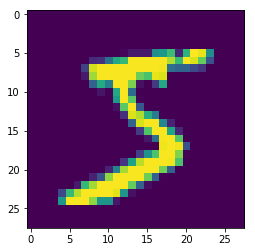

In [0]:
# Displaying the shape of the training data
print (X_train.shape) 
# importint matplot library to plot graphs
from matplotlib import pyplot as plt
#
%matplotlib inline
#plotting the first training data entry
plt.imshow(X_train[0])

The print output displays that there are 60,000 data entries of size 28x28.


In [0]:
#reshaping the training and testing data
#and representing in 3 dimension
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
#Change the datatype to float as later all the 
#values later will be scaled from 0 to 1
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
#The data contains pixel values ranging
#from 0-255, hence dividing all value by 255
#so that the data comes in range of 0-1
X_train /= 255
X_test /= 255

In [0]:
#displaying the first 10 values of y_train array
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
# As the total number of classes are 10
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
#Displaying the first 10 entries of Y_train variable
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

Here 10 columns in the output represents the 10 categories of the variable, and in between 

where ever there is 1, it signifies that the entry belongs to that category.


In [0]:
#importiny activation and Max pooling
from keras.layers import Activation, MaxPooling2D
#Loading the sequential model as it allows to add layers
model = Sequential() 
#input channel dimensions are 28x28x1
#Adding a convolution 2d layer with activation as relu
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
#global receptive field is 3x3
#input channel dimensions are 26x26x32
model.add(Convolution2D(64, 3, 3, activation='relu'))
#global receptive field is 5x5
#input channel dimensions are 24x24x64
model.add(Convolution2D(128, 3, 3, activation='relu'))
#global receptive field is 7x7
#input channel dimensions are 22x22x128
#Max pooling is done here
model.add(MaxPooling2D(pool_size=(2, 2)))
#global receptive field is 14x14
#input channel dimensions are 11x11x128
model.add(Convolution2D(256, 3, 3, activation='relu'))
#global receptive field is 16x16
#input channel dimensions are 9x9x256
model.add(Convolution2D(512, 3, 3, activation='relu'))
#global receptive field is 18x18
#input channel dimensions are 7x7x512
model.add(Convolution2D(1024, 3, 3, activation='relu'))
#global receptive field is 20x20
#input channel dimensions are 5x5x1024
model.add(Convolution2D(2048, 3, 3, activation='relu'))
#global receptive field is 22x22
#input channel dimensions are 3x3x2048
model.add(Convolution2D(10, 3, 3))
#model.add(Convolution2D(10, 3, 3),activation='relu')
#global receptive field is 24x24
#input channel dimensions are 1x1x10
#flatten function reduces the dimension, 
#hence the 3D data will be reduced to 1D
model.add(Flatten())
# Softmax layer will divide the output between 0 and 1
# in such a way that thier summation is equal to 1
# there as here there are 10 categories, therefore the output
# will be a probability distribution
model.add(Activation('softmax'))
#Display the summary of the model i.e. layers, output, parameter 
#generated
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 5, 5, 1024)        4719616   
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Conv2

In [0]:
#compile function is used after the model is loaded
#it is used to give the loss function, optimizer and metrics data
#Here the loss function is categotical_crossentrophy, optimzer is adam
# and metrics is accuracy.
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
#Fit function is used to train the model, The batch size here is 32 
#meaning after a set of 32 data entries is made and weights and biases will be
#updated after it. Total epochs is 10, meaning 60000 images will be loaded 10 times 
#fully in the system. Verbose is a parameter which is set for displaying the output
#at every iteration.
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

In [0]:
#model.evaluate will return the loss and accuracy obtained
#over the testing data
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)# will display the value stored in variable score

In [0]:
#Trained model is run over the testing data
#and the predicted output in stored in y_pred 
#variable.
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])#Will display the values predicted by the system
print(y_test[:9])#Will display the actual values

Reasons why this is not an ideal network is that?

*   *Training is Slow*
*   *Poor Accuracy*

**Reasons for Slow Training**
1.   2,53,48,362 parameters are generated in every every epoch. A lot of parameters are generated which is not required for such a simple dataset. Hence, analyzing and storing these parameters consumes time which is slowing the system

**Reasons for Poor Accuracy**
1.   Assumption made is that the size of the object has to be the size of the image, but the global receptive field of the last layer is 24x24 where as size of the object is 28x 28, hence whole image   is not seen which results in decrease of accuracy.
2.   From 2048 Channels, there is a drop to 10 channels, hence resulting is a huge loss of important features.
3.  Flatten layer is added which reduces the dimension of the data, therefore here also there is a loss of data which is not appreciated when the network in close to the output layer.




